In [304]:
# import python library packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Time Series Analysis of Stock Price <br>
- The Disney ('dis') data used in this analysis can be retrived from: [Disney Stock Prices](https://www.nasdaq.com/market-activity/stocks/dis/historical)

In [306]:
dis = pd.read_csv('DIS.csv')
dis.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,03/16/2022,$138.14,10638740,$135.65,$138.98,$134.94
1,03/15/2022,$134.20,9834809,$129.74,$134.56,$129.51
2,03/14/2022,$129.03,9971526,$130.98,$133.07,$128.38
3,3/11/2022,$131.75,7058388,$135.08,$136.16,$131.57
4,3/10/2022,$133.64,8447238,$132.36,$134.20,$131.62
5,3/9/2022,$133.65,14673080,$135.49,$135.50,$133.36
6,3/8/2022,$131.75,16552010,$133.02,$135.49,$129.29
7,3/7/2022,$133.50,14549670,$140.28,$140.89,$133.44
8,3/4/2022,$140.72,12925360,$144.01,$144.26,$139.55
9,3/3/2022,$145.57,8048440,$147.31,$148.65,$144.45


In [307]:
dis.shape

(1259, 6)

### Clean Data

In [308]:
# dis.isnull().values.any()
# dis.dtypes
dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1259 non-null   object
 1   Close/Last  1259 non-null   object
 2   Volume      1259 non-null   int64 
 3   Open        1259 non-null   object
 4   High        1259 non-null   object
 5   Low         1259 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


#### Tidying the data:
<ol>
    <li> To rename the column "Close/Last" to "Close" </li>
    <li> Convert the 'Date' object to datetime and sort it in ascending order </li>
    <li> Convert the 'Close','Open','High','Low' object type into float </li>
    <li> To set 'Date' as index </li>
</ol>

In [309]:
# 1. To rename the column "Close/Last" to "Close"
dis.rename(columns={"Close/Last": "Close"}, inplace=True)
dis.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [310]:
# 2. Convert the 'Date' object to datetime
dis['Date'] = pd.to_datetime(dis['Date'], format='%m/%d/%Y')
dis.dtypes

Date      datetime64[ns]
Close             object
Volume             int64
Open              object
High              object
Low               object
dtype: object

In [311]:
# To sort date by ascending order for the purpose of our analysis
dis.sort_values(by='Date', inplace=True)
dis

,Date,Close,Volume,Open,High,Low
1258,2017-03-17,$111.76,9060161,$111.87,$112.09,$111.18
1257,2017-03-20,$112.71,8156298,$112.07,$113.16,$112.05
1256,2017-03-21,$111.75,7109985,$112.97,$113.10,$111.54
1255,2017-03-22,$112.08,5038725,$111.85,$112.18,$111.35
1254,2017-03-23,$112.24,8307012,$111.71,$112.98,$111.66
...,...,...,...,...,...,...
4,2022-03-10,$133.64,8447238,$132.36,$134.20,$131.62
3,2022-03-11,$131.75,7058388,$135.08,$136.16,$131.57
2,2022-03-14,$129.03,9971526,$130.98,$133.07,$128.38
1,2022-03-15,$134.20,9834809,$129.74,$134.56,$129.51


In [312]:
# 3. Convert the 'Close','Open','High','Low' object type into float
cols = ['Close','Open','High','Low']
dis[cols]  = dis[cols].replace({'\$': '', ',': ''}, regex=True).astype(float)
dis

,Date,Close,Volume,Open,High,Low
1258,2017-03-17,111.76,9060161,111.87,112.09,111.18
1257,2017-03-20,112.71,8156298,112.07,113.16,112.05
1256,2017-03-21,111.75,7109985,112.97,113.10,111.54
1255,2017-03-22,112.08,5038725,111.85,112.18,111.35
1254,2017-03-23,112.24,8307012,111.71,112.98,111.66
...,...,...,...,...,...,...
4,2022-03-10,133.64,8447238,132.36,134.20,131.62
3,2022-03-11,131.75,7058388,135.08,136.16,131.57
2,2022-03-14,129.03,9971526,130.98,133.07,128.38
1,2022-03-15,134.20,9834809,129.74,134.56,129.51


In [313]:
# 4. To set Date as index
dis.set_index('Date',inplace=True)
dis

,Close,Volume,Open,High,Low
Date,,,,,
2017-03-17,111.76,9060161,111.87,112.09,111.18
2017-03-20,112.71,8156298,112.07,113.16,112.05
2017-03-21,111.75,7109985,112.97,113.10,111.54
2017-03-22,112.08,5038725,111.85,112.18,111.35
2017-03-23,112.24,8307012,111.71,112.98,111.66
...,...,...,...,...,...
2022-03-10,133.64,8447238,132.36,134.20,131.62
2022-03-11,131.75,7058388,135.08,136.16,131.57
2022-03-14,129.03,9971526,130.98,133.07,128.38


### Visualisation

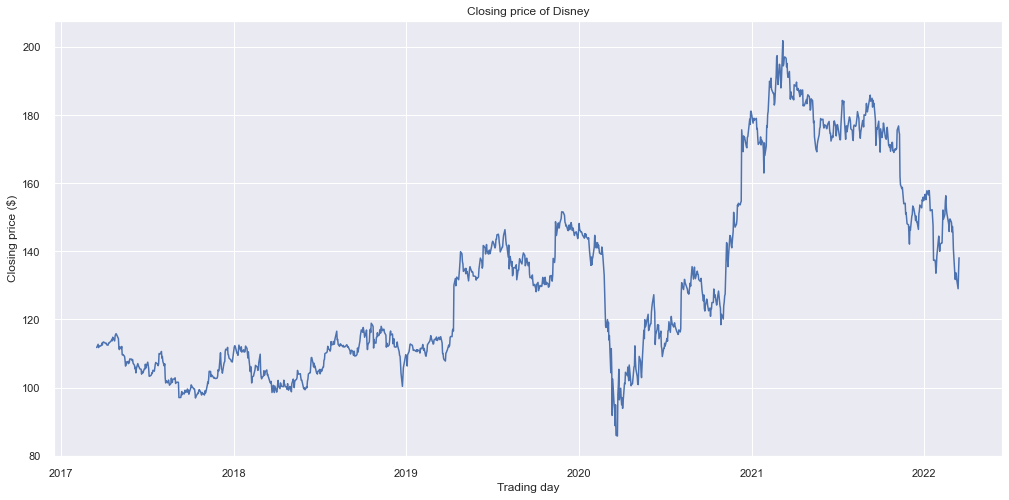

In [272]:
plt.figure(figsize=(17, 8))
plt.plot(dis.Close)
plt.title('Closing price of Disney')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.show()

## Simple Moving Average (SMA)

> Weigh all price action equally (also know an unweighted mean)<br>
To compute the SMA, we can use the pandas method: <b> pandas.Series.rolling <b>

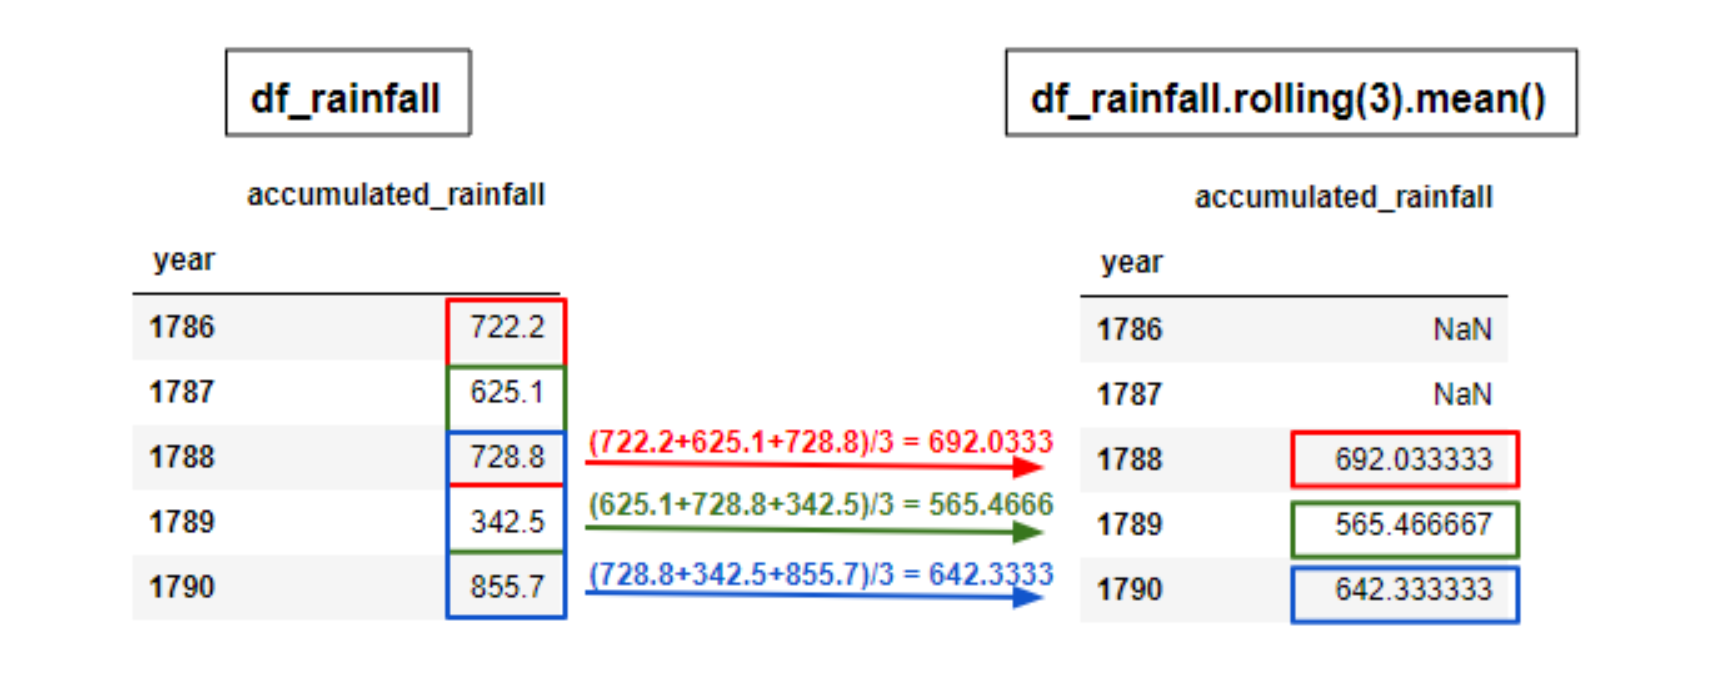

In [273]:
# Compute the simple moving average over a 5 days period
dis.drop(['SMA_5'], axis=1, errors='ignore')
dis['SMA_5'] = dis.Close.rolling(5).mean()
dis

,Close,Volume,Open,High,Low,SMA_5
Date,,,,,,
2017-03-17,111.76,9060161,111.87,112.09,111.18,NaN
2017-03-20,112.71,8156298,112.07,113.16,112.05,NaN
2017-03-21,111.75,7109985,112.97,113.10,111.54,NaN
2017-03-22,112.08,5038725,111.85,112.18,111.35,NaN
2017-03-23,112.24,8307012,111.71,112.98,111.66,112.108
...,...,...,...,...,...,...
2022-03-10,133.64,8447238,132.36,134.20,131.62,134.652
2022-03-11,131.75,7058388,135.08,136.16,131.57,132.858
2022-03-14,129.03,9971526,130.98,133.07,128.38,131.964


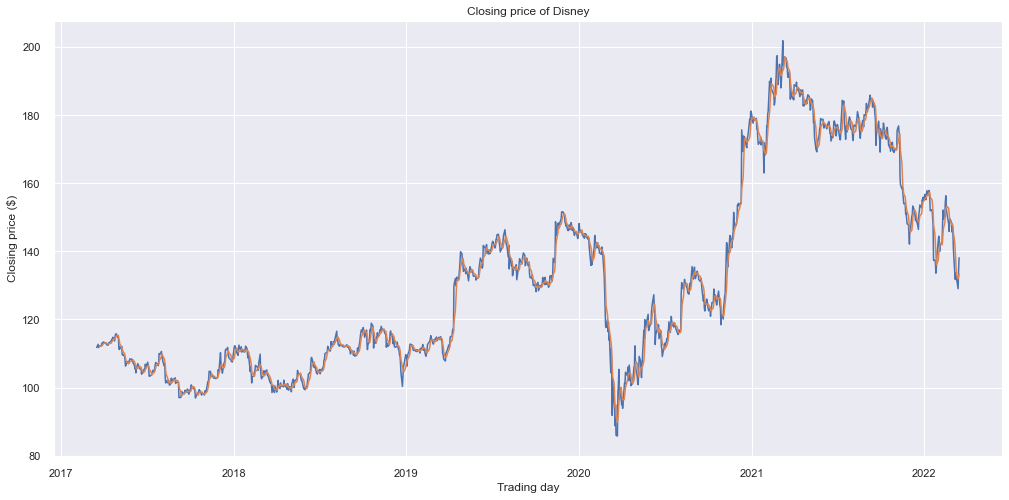

In [274]:
plt.figure(figsize=(17, 8))
plt.plot(dis.Close)
plt.plot(dis.SMA_5)
plt.title('Closing price of Disney')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.show()

In [275]:
# Compute the simple moving average over a 30 days period
dis.drop(['SMA_30'], axis=1, errors='ignore')
dis['SMA_30'] = dis.Close.rolling(30).mean()
dis

,Close,Volume,Open,High,Low,SMA_5,SMA_30
Date,,,,,,,
2017-03-17,111.76,9060161,111.87,112.09,111.18,NaN,NaN
2017-03-20,112.71,8156298,112.07,113.16,112.05,NaN,NaN
2017-03-21,111.75,7109985,112.97,113.10,111.54,NaN,NaN
2017-03-22,112.08,5038725,111.85,112.18,111.35,NaN,NaN
2017-03-23,112.24,8307012,111.71,112.98,111.66,112.108,NaN
...,...,...,...,...,...,...,...
2022-03-10,133.64,8447238,132.36,134.20,131.62,134.652,144.649333
2022-03-11,131.75,7058388,135.08,136.16,131.57,132.858,144.527000
2022-03-14,129.03,9971526,130.98,133.07,128.38,131.964,144.207000


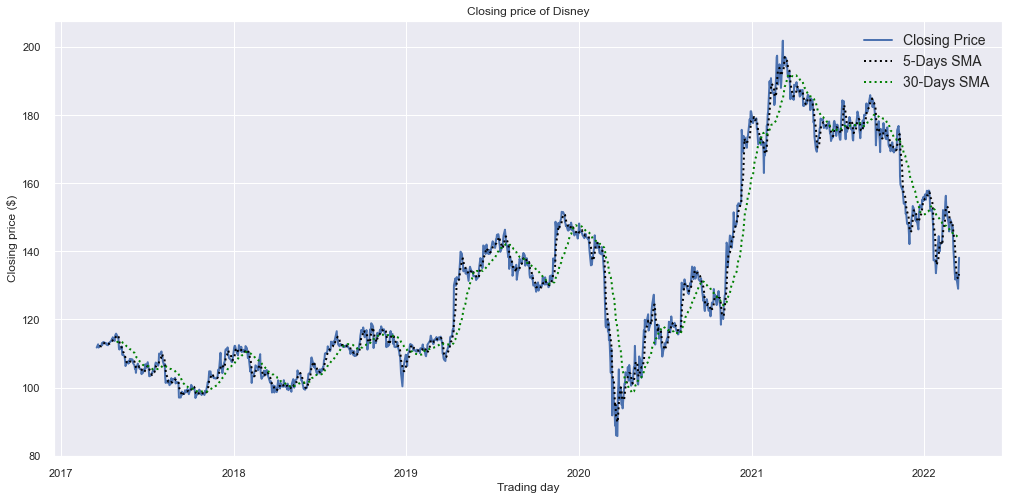

In [303]:
plt.figure(figsize=(17, 8))
plt.plot(dis.Close,linestyle='-', linewidth=2)
plt.plot(dis.SMA_5,color='black', linestyle=':', linewidth=2)
plt.plot(dis.SMA_30,color='green', linestyle=':', linewidth=2)
plt.legend(labels=['Closing Price', '5-Days SMA','30-Days SMA'], fontsize=14)
plt.title('Closing price of Disney')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.show()

#### Conclusion: increasing the value will improves the smoothing at the expense of accuracy.

## Exponential Moving average (EMA)

- A method use to filter out noise and identify trends.
- The weight of each element decreases progressively over time (i.e the exponential moving average gives greater weight to recent data points.)
- Therefore, as compared to the SMA,  the EMA reacts faster to changes as it is more sensitive to recent movements.
- To compute the EMA, we can use the pandas method: <b>  pandas.Series.ewm <b>

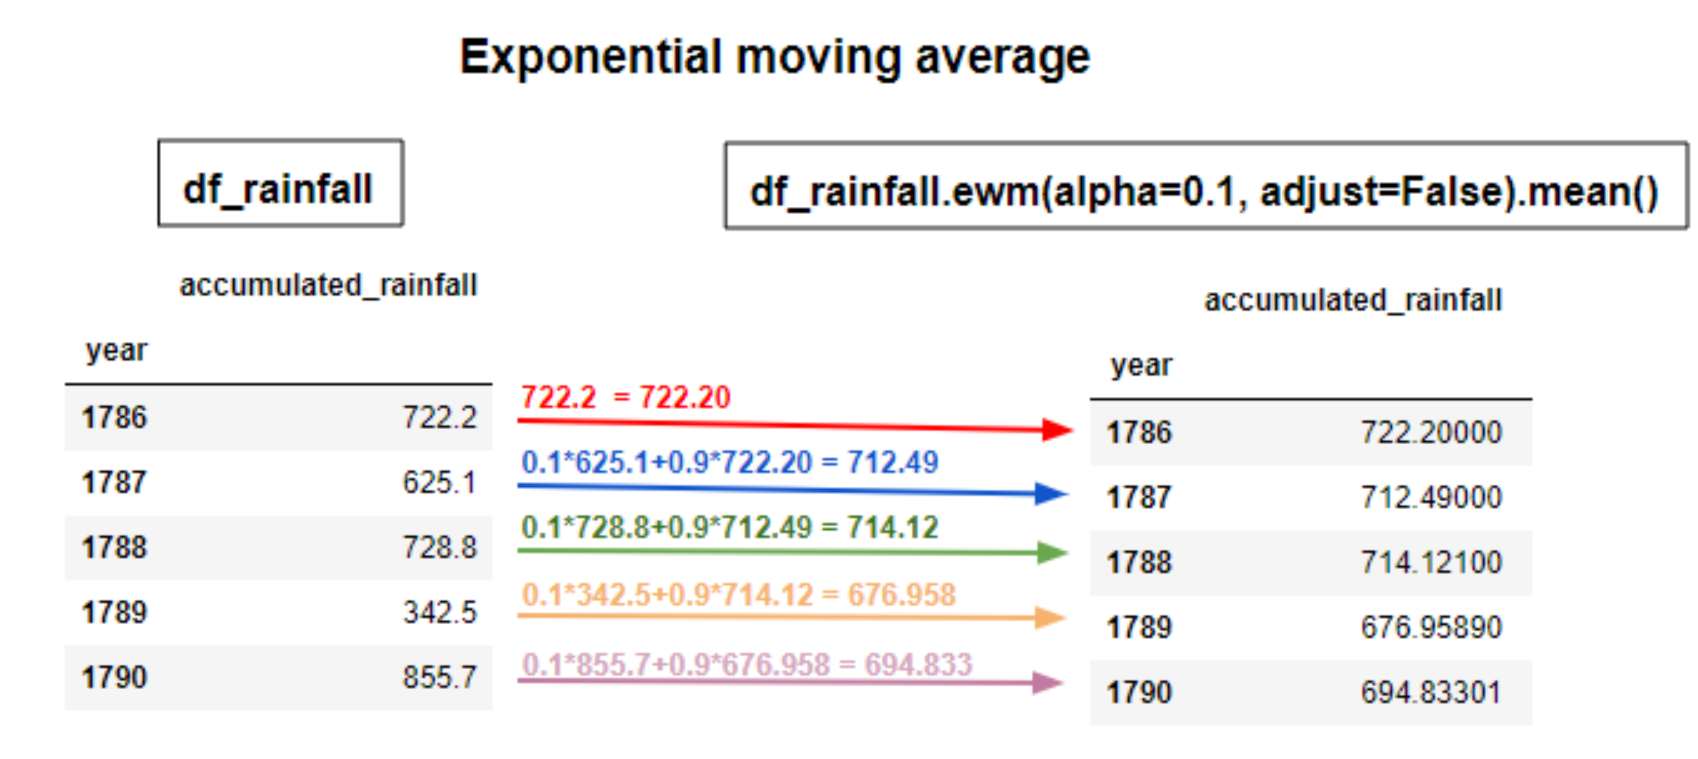

In [298]:
# Select a random row n and the following 99 days
s =np.random.choice(dis.index[:-100],1) # Return a index of a sample row
print (s)
sample_dis = dis.iloc[dis.index.get_loc(s[0]):dis.index.get_loc(s[0])+100].copy()
sample_dis.shape

['2020-02-26T00:00:00.000000000']


(100, 7)

In [299]:
sample_dis

,Close,Volume,Open,High,Low,SMA_5,SMA_30
Date,,,,,,,
2020-02-26,123.36,31227000,126.12,128.37,122.13,132.780,139.888000
2020-02-27,118.04,30827530,119.81,122.90,117.92,128.314,138.982667
2020-02-28,117.65,35453800,114.51,118.31,113.21,124.050,138.093667
2020-03-02,119.98,21775920,119.13,119.98,116.03,121.444,137.255667
2020-03-03,116.45,19529720,121.15,121.78,115.15,119.096,136.326333
...,...,...,...,...,...,...,...
2020-07-13,116.22,15620190,119.94,120.13,115.89,116.532,116.864333
2020-07-14,118.66,12425140,115.23,119.08,114.54,117.538,116.860667
2020-07-15,120.90,15314200,121.63,122.09,119.70,118.386,116.932333


In [300]:
'''
A smoothing factor ranges from 0 to 1 and represents the weighting applied to the most recent period.
pandas.Series.ewm method provides two variants of exponential weights. 
By setting the parameter adjust=False in the below, 
we are calculating the exponential moving average using an algebraic formula.
'''

#For a 200-day moving average, a alpha of [2/(200+1)] is typically being used. 
smoothing = 2/(200+1)
print (smoothing)
sample_dis['EMA1'] = dis.Close.ewm(alpha=smoothing, adjust=False).mean()


0.009950248756218905


- [EMA Smoothing factor](https://www.investopedia.com/terms/e/ema.asp)

In [301]:
sample_dis

,Close,Volume,Open,High,Low,SMA_5,SMA_30,EMA1
Date,,,,,,,,
2020-02-26,123.36,31227000,126.12,128.37,122.13,132.780,139.888000,136.597653
2020-02-27,118.04,30827530,119.81,122.90,117.92,128.314,138.982667,136.412999
2020-02-28,117.65,35453800,114.51,118.31,113.21,124.050,138.093667,136.226303
2020-03-02,119.98,21775920,119.13,119.98,116.03,121.444,137.255667,136.064648
2020-03-03,116.45,19529720,121.15,121.78,115.15,119.096,136.326333,135.869477
...,...,...,...,...,...,...,...,...
2020-07-13,116.22,15620190,119.94,120.13,115.89,116.532,116.864333,120.572732
2020-07-14,118.66,12425140,115.23,119.08,114.54,117.538,116.860667,120.553700
2020-07-15,120.90,15314200,121.63,122.09,119.70,118.386,116.932333,120.557145


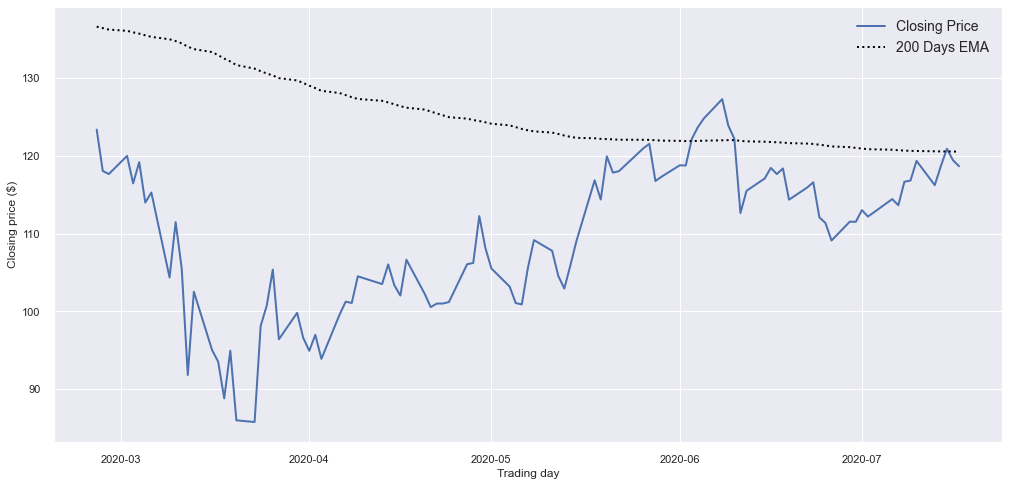

In [302]:
plt.figure(figsize=(17, 8))
plt.plot(sample_dis.Close,linestyle='-', linewidth=2)
plt.plot(sample_dis.EMA1,color='black', linestyle=':', linewidth=2)
plt.legend(labels=['Closing Price', '200 Days EMA'], fontsize=14)
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.show()